# 필수과제1
- NA값이 있는 데이터를 공유할 예정 
- 해당 NA값들을 위의 나온 방법을 가지고 실제 결측치를 대체해 주세요.
- 결측치를 대체한 후에 groupby를 통한 다른 피처들과의 관계를 비교하면서 값들이 어떤 식으로 대체되었는지를 정리해 주세요.

### 필수과제 1-1
- 4개의 피처가 있는데, 1개 피처만 NA값이 있어서 -> 이걸 위의 방법으로 대체한 후에, 다른 컬럼들과의 관계를 통해서 어떤 식으로 값들이 변화하는지

#결측값 컬럼
MedInc 소득 컬럼에 대해 결측치를 만들고 과제 진행해 주세요.

#피처 설명

MedInc: 해당 지역의 중간 소득. 이 값은 수천 달러 단위로 표현됩니다. 중간 소득이 높을수록 해당 지역의 주민들은 더 많은 돈을 벌고 있다는 것을 의미합니다.

HouseAge: 해당 지역의 중앙값 주택 연령. 이는 지역에 있는 주택들 중간의 연령을 나타냅니다.

AveRooms: 지역의 평균 방 갯수. 이 값은 해당 지역의 모든 주택의 방 수를 평균낸 것입니다.

AveBedrms: 지역의 평균 침실 갯수. 이 값은 해당 지역의 모든 주택의 침실 수를 평균낸 것입니다.

Population: 해당 지역의 인구. 이는 해당 지역에 살고 있는 사람들의 수를 나타냅니다.

AveOccup: 평균 주택 점유율. 이는 한 주택에 평균적으로 거주하는 사람의 수를 나타냅니다.

Latitude: 해당 지역의 위도입니다.

Longitude: 해당 지역의 경도입니다.

Target: 이는 해당 지역의 중앙값 주택 가격을 나타냅니다. 이 값은 수십만 달러 단위로 표현됩니다.

In [1]:
# !! pip install fancyimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [2]:
#꼭 읽어주세요!
#사이킷런 제공하는 캘리포니아 집값 데이터 셋 불러오는 코드
from sklearn.datasets import fetch_california_housing
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()
# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target  # 목표 변수 추가

---
# 필수과제 1-2

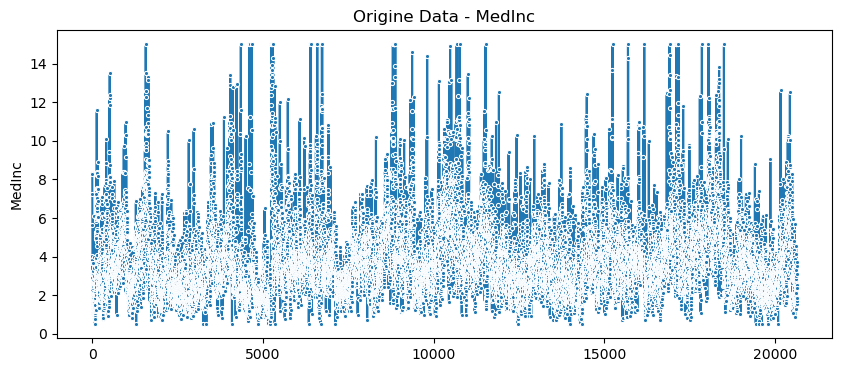

In [5]:
# 원본데이터 시각화
plt.figure(figsize=(10,4))
sns.lineplot(data=df_housing['MedInc'], marker='.')
plt.title('Origine Data - MedInc')
plt.show()

In [42]:
df_test = pd.DataFrame(df_housing['MedInc']) # 중위소득만 담기

df_test

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [43]:
# 결측치를 만들기
for i in range(20, len(df_test), 1000) :
    df_test.loc[i:i+300, 'MedInc'] = np.nan

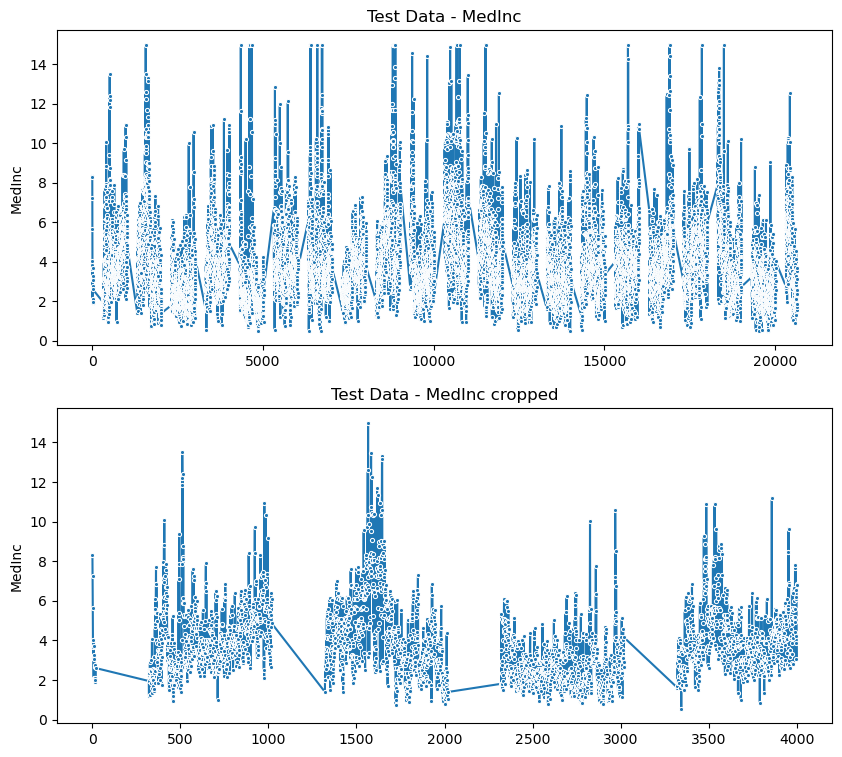

In [30]:
# 시각화 해서 결측치 확인 + 일부분만 크롭해서 결측치 잘 들어갔나 확인
fig, axs = plt.subplots(2,1,figsize=(10,9))
sns.lineplot(data=df_test['MedInc'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Test Data - MedInc')
sns.lineplot(data=df_test['MedInc'].loc[0:4000], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Test Data - MedInc cropped')
plt.show()

In [44]:
# 1. 1차 선형보간법, interpolate
df_linear = df_test.interpolate(method = 'linear')

# 2. 2차 선형보간법, interpolate
df_quadratic = df_test.interpolate(method = 'quadratic')

# 3. 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df_test) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean)

# 4.0값으로 대체 
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero = df_test.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df_test)
df_knn = pd.DataFrame(df_knn)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체 
df_mice = mice_imputer.fit_transform(df_test)
df_mice = pd.DataFrame(df_mice)

In [45]:
df_Origine = pd.DataFrame(df_housing[['HouseAge','Population','AveRooms', 'MedInc']])

df_linear = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_linear,
                     left_index=True, right_index=True)
df_quadratic = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_quadratic,
                     left_index=True, right_index=True)
df_mean = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_mean,
                     left_index=True, right_index=True)
df_zero = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_zero,
                     left_index=True, right_index=True)
df_knn = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_knn,
                     left_index=True, right_index=True)
df_mice = pd.merge(pd.DataFrame(df_housing[['HouseAge','Population','AveRooms']]), df_mice,
                     left_index=True, right_index=True)

---
### describe() 매서드로 기술통계로 비교해보기

In [68]:
df_Origine.loc[10:25]
df_Origine.describe()

,HouseAge,Population,AveRooms,MedInc
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,3.870671
std,12.585558,1132.462122,2.474173,1.899822
min,1.000000,3.000000,0.846154,0.499900
25%,18.000000,787.000000,4.440716,2.563400
50%,29.000000,1166.000000,5.229129,3.534800
75%,37.000000,1725.000000,6.052381,4.743250
max,52.000000,35682.000000,141.909091,15.000100


In [61]:
df_linear.loc[10:25]
df_linear.describe()

,HouseAge,Population,AveRooms,MedInc
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,3.922421
std,12.585558,1132.462122,2.474173,1.856971
min,1.000000,3.000000,0.846154,0.499900
25%,18.000000,787.000000,4.440716,2.625000
50%,29.000000,1166.000000,5.229129,3.575000
75%,37.000000,1725.000000,6.052381,4.797618
max,52.000000,35682.000000,141.909091,15.000100


In [62]:
df_quadratic.loc[10:25]
df_quadratic.describe()

,HouseAge,Population,AveRooms,MedInc
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,4.687865
std,12.585558,1132.462122,2.474173,61.822992
min,1.000000,3.000000,0.846154,-377.683329
25%,18.000000,787.000000,4.440716,2.205100
50%,29.000000,1166.000000,5.229129,3.616100
75%,37.000000,1725.000000,6.052381,5.724050
max,52.000000,35682.000000,141.909091,448.240275


In [70]:
df_mean.loc[10:25]
df_mean.describe()

,HouseAge,Population,AveRooms,0
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,3.905281
std,12.585558,1132.462122,2.474173,1.563243
min,1.000000,3.000000,0.846154,0.499900
25%,18.000000,787.000000,4.440716,3.043700
50%,29.000000,1166.000000,5.229129,3.905281
75%,37.000000,1725.000000,6.052381,4.165200
max,52.000000,35682.000000,141.909091,15.000100


In [64]:
df_zero.loc[10:25]
df_zero.describe()

,HouseAge,Population,AveRooms,MedInc
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,2.709289
std,12.585558,1132.462122,2.474173,2.384151
min,1.000000,3.000000,0.846154,0.000000
25%,18.000000,787.000000,4.440716,0.000000
50%,29.000000,1166.000000,5.229129,2.708300
75%,37.000000,1725.000000,6.052381,4.165200
max,52.000000,35682.000000,141.909091,15.000100


In [65]:
df_knn.loc[10:25]
df_knn.describe()

,HouseAge,Population,AveRooms,0
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,3.905281
std,12.585558,1132.462122,2.474173,1.563243
min,1.000000,3.000000,0.846154,0.499900
25%,18.000000,787.000000,4.440716,3.043700
50%,29.000000,1166.000000,5.229129,3.905281
75%,37.000000,1725.000000,6.052381,4.165200
max,52.000000,35682.000000,141.909091,15.000100


In [67]:
df_mice.loc[10:25]
df_mice.describe()

,HouseAge,Population,AveRooms,0
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,5.429000,3.905281
std,12.585558,1132.462122,2.474173,1.563243
min,1.000000,3.000000,0.846154,0.499900
25%,18.000000,787.000000,4.440716,3.043700
50%,29.000000,1166.000000,5.229129,3.905281
75%,37.000000,1725.000000,6.052381,4.165200
max,52.000000,35682.000000,141.909091,15.000100
